<a href="https://colab.research.google.com/github/samvardhan777/multimodal-search/blob/main/Multi_Model_Search_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 719.9 kB/s eta 0:00:00


In [2]:
!pip install salesforce-lavis

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.4 MB/s eta 0:0

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
from tqdm import tqdm
import torch
import torch.nn.functional as F
from pkg_resources import packaging
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_theme("notebook", font_scale=1.3)
import os
import json
from deep_translator import GoogleTranslator
from scipy import spatial

from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
import numpy as np, matplotlib, matplotlib.pyplot as plt, seaborn as sns

In [3]:
from lavis.models import model_zoo
print(model_zoo)

/usr/local/lib/python3.10/dist-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/usr/local/lib/python3.10/dist-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

# Functions

In [4]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

Using device: cpu



In [5]:
from deep_translator import GoogleTranslator
def translate_caption(string):
    try:
        string_translated = GoogleTranslator(source='auto', target='en').translate(string)
        return string_translated
    except Exception as e:
        # Simplified error message
        print(f"Error translating string: {string}. Error: {str(e)}")
        return ''

# Load images and texts

Read the map with the path to the images and their corresponding descriptions. Put the images and the descriptions in the lists "images" and "texts". Show images, description and name in a figure

In [6]:
from datasets import load_dataset
from PIL import Image
dataset = load_dataset("Marqo/deepfashion-multimodal", split='data')
NUM_SAMPLES = 100
subset = dataset.select(range(NUM_SAMPLES))

Generating data split:   0%|          | 0/42537 [00:00<?, ? examples/s]

In [7]:
from PIL import Image

images = []
texts = []
names_image = []

for item in subset:
    image = item['image'].convert("RGB")
    text = item['text']
    image_name = item['item_ID']
    image.show()
    print(text)
    images.append(image)
    texts.append(text)
    names_image.append(image_name)

The lower clothing is of long length. The fabric is cotton and it has plaid patterns.
His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.
His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.
His shirt has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The person wears a long pants. The pants are with cotton fabric and solid color patterns.
The sweater the person wears has long sleeves, its fabric is denim, and it has solid color patterns. The sweater has a lapel neckline. The person wears a long pants, with cotton fabric and solid color patterns.
The person wears a short-sleeve T-shirt with solid color patterns and long pants. The T-shirt is with cotton fabric and it has a r

# Apply BLIP from LAVIS lib - images, text and multimodal embedding

name="blip_feature_extractor", model_type="base"

In [8]:
from lavis.models import load_model_and_preprocess
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_feature_extractor", model_type="base", is_eval=True, device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.97G/1.97G [00:21<00:00, 99.8MB/s]
/usr/local/lib/python3.10/dist-packages/lavis/models/blip_models/blip.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

In [9]:
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

## Extraction of the embeddings

In [10]:
images_embedding = None
texts_embedding = None
multimodal_embedding = None

for text, image in zip(texts, images):
    print("Processing text:", text)

    image_processed = vis_processors["eval"](image).unsqueeze(0).to(device)

    text_translated = translate_caption(text[0])
    text_input = txt_processors["eval"](text_translated)
    sample = {"image": image_processed, "text_input": [text_input]}

    multimodal_emb = model.extract_features(sample).multimodal_embeds[:, 0, :]  # size (1, 768)
    image_emb = model.extract_features(sample, mode="image").image_embeds[:, 0, :]  # size (1, 768)
    text_emb = model.extract_features(sample, mode="text").text_embeds[:, 0, :]  # size (1, 768)

    # Stack tensors
    if images_embedding is None:
        images_embedding = image_emb
    else:
        images_embedding = torch.cat((images_embedding, image_emb), 0)

    if texts_embedding is None:
        texts_embedding = text_emb
    else:
        texts_embedding = torch.cat((texts_embedding, text_emb), 0)

    if multimodal_embedding is None:
        multimodal_embedding = multimodal_emb
    else:
        multimodal_embedding = torch.cat((multimodal_embedding, multimodal_emb), 0)
    if images_embedding is not None:
        print('images_embedding.size():', images_embedding.size())
    else:
        print('images_embedding is None')

    if texts_embedding is not None:
        print('texts_embedding.size():', texts_embedding.size())
    else:
        print('texts_embedding is None')

    if multimodal_embedding is not None:
        print('multimodal_embedding.size():', multimodal_embedding.size())
    else:
        print('multimodal_embedding is None')


Processing text: The lower clothing is of long length. The fabric is cotton and it has plaid patterns.
images_embedding.size(): torch.Size([1, 768])
texts_embedding.size(): torch.Size([1, 768])
multimodal_embedding.size(): torch.Size([1, 768])
Processing text: His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.
images_embedding.size(): torch.Size([2, 768])
texts_embedding.size(): torch.Size([2, 768])
multimodal_embedding.size(): torch.Size([2, 768])
Processing text: His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.
images_embedding.size(): torch.Size([3, 768])
texts_embedding.size(): torch.Size([3, 768])
multimodal_embedding.size(): torch.Size([3, 768])
Processing text: His shirt has short sleeves, cot

## Normalization

Divide each tensors by its norm. In this way when i calculate the dot product between two tensors i directly obtain the cosin between the two

In [11]:
images_embedding /= images_embedding.norm(dim=-1, keepdim=True)
texts_embedding /= texts_embedding.norm(dim=-1, keepdim=True)
multimodal_embedding /= multimodal_embedding.norm(dim=-1, keepdim=True)

## Similarity matrices

In [12]:
def search_similar_product(image_target=None, text_target=None, number_retrieval=5, search_modality="MM", len_dataset=68, is_coco_finetuned=False):
    retrieval_map = {}

    # Preprocess image: If image_target is None, create a random tensor based on the modality
    if image_target is None:
        if is_coco_finetuned:
            image_processed = torch.rand(1, 3, 364, 364).to(device)
        else:
            image_processed = torch.rand(1, 3, 224, 224).to(device)
    else:
        image_processed = vis_processors["eval"](image_target).unsqueeze(0).to(device)

    # Preprocess text
    text_translated = translate_caption(text_target)
    text_input = txt_processors["eval"](text_translated)

    # Build sample
    sample = {"image": image_processed, "text_input": [text_input]}

    # Find features of image and text target
    multimodal_emb = model.extract_features(sample).multimodal_embeds[0, 0, :]  # size (768)
    image_emb = model.extract_features(sample, mode="image").image_embeds[0, 0, :]  # size (768)
    text_emb = model.extract_features(sample, mode="text").text_embeds[0, 0, :]  # size (768)

    # Normalize
    image_emb = image_emb / image_emb.norm(dim=-1, keepdim=True)
    text_emb = text_emb / text_emb.norm(dim=-1, keepdim=True)
    multimodal_emb = multimodal_emb / multimodal_emb.norm(dim=-1, keepdim=True)

    # Convert tensors to numpy arrays
    image_emb = image_emb.cpu().detach().numpy()
    text_emb = text_emb.cpu().detach().numpy()
    multimodal_emb = multimodal_emb.cpu().detach().numpy()

    # Compute similarity based on the search modality
    if search_modality == "II":
        similarity_vector = images_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TI":
        similarity_vector = images_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MI":
        similarity_vector = images_embedding.cpu().detach().numpy() @ multimodal_emb.T
    elif search_modality == "IT":
        similarity_vector = texts_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TT":
        similarity_vector = texts_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MT":
        similarity_vector = texts_embedding.cpu().detach().numpy() @ multimodal_emb.T
    elif search_modality == "IM":
        similarity_vector = multimodal_embedding.cpu().detach().numpy() @ image_emb.T
    elif search_modality == "TM":
        similarity_vector = multimodal_embedding.cpu().detach().numpy() @ text_emb.T
    elif search_modality == "MM":
        similarity_vector = multimodal_embedding.cpu().detach().numpy() @ multimodal_emb.T

    # Sort the similarity vector in descending order
    index_sorted = np.argsort(similarity_vector)[::-1]

    for i in range(1, number_retrieval + 1):
        print("Extracted: ", i)

        # Index of the db product
        idx = index_sorted[i - 1]
        similarity_value = similarity_vector[idx]

        print("idx: ", idx)
        print("similarity value: ", similarity_value)

        # Extract name of the image
        name_image_found = names_image[idx]
        print("name_image_found: ", name_image_found)
        print("-----------------------")

        # Extract text of the image
        translated_text_image_found = texts[idx]

        # Extract image
        image_found = images[idx]

        # Fill the extracted infos in the map
        retrieval_map[i] = (image_found, name_image_found, translated_text_image_found, similarity_value)

    return retrieval_map

function to plot the similarity matrixfor the plot i use
https://stackoverflow.com/questions/67310634/how-to-plot-image-image-similarity-matrix-map

Extracted:  1
idx:  76
similarity value:  0.52301705
name_image_found:  MEN-Denim-id_00005887-01_7_additional
-----------------------
Extracted:  2
idx:  90
similarity value:  0.52037483
name_image_found:  MEN-Denim-id_00007216-01_7_additional
-----------------------
Extracted:  3
idx:  56
similarity value:  0.51875263
name_image_found:  MEN-Denim-id_00003252-01_1_front
-----------------------
Extracted:  4
idx:  77
similarity value:  0.512889
name_image_found:  MEN-Denim-id_00005887-02_7_additional
-----------------------
Extracted:  5
idx:  28
similarity value:  0.49060726
name_image_found:  MEN-Denim-id_00000826-02_7_additional
-----------------------


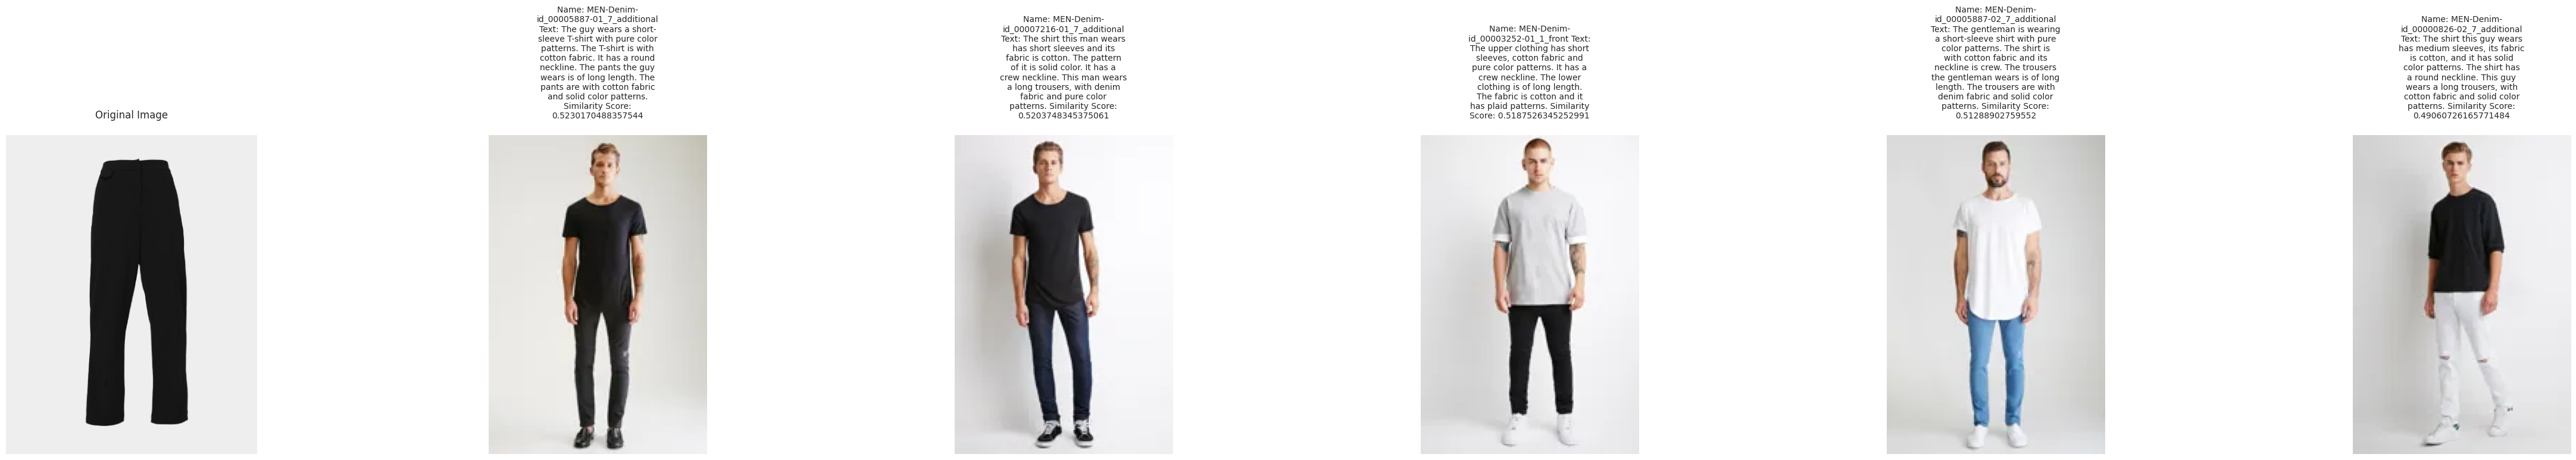

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap

def display_images_side_by_side(original_image, output_images, output_texts):
    num_images = len(output_images) + 1  # Including the original image

    # Create a matplotlib figure with subplots arranged horizontally
    fig, axes = plt.subplots(1, num_images, figsize=(8 * num_images, 8))

    if num_images == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one image


    axes[0].imshow(original_image)
    axes[0].set_title("Original Image", fontsize=12, pad=20)
    axes[0].axis('off')

    for i in range(1, num_images):
        axes[i].imshow(output_images[i-1])
        wrapped_text = textwrap.fill(output_texts[i-1], width=30)
        axes[i].set_title(wrapped_text, fontsize=10, pad=20)  # pad adds space between title and image
        axes[i].axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

image_target = Image.open('/content/test_image_3.png').convert("RGB")  # Convert to RGB to ensure 3 channels
text_target = "Black pant"
search_modality = "MM"
number_retrieval = 5

retrieval_results = search_similar_product(
    image_target=image_target,
    text_target=text_target,
    number_retrieval=number_retrieval,
    search_modality=search_modality
)

output_images = []
output_texts = []

for i, result in retrieval_results.items():
    output_images.append(result[0])
    details = f"Name: {result[1]}\nText: {result[2]}\nSimilarity Score: {result[3]}"
    output_texts.append(details)

display_images_side_by_side(image_target, output_images, output_texts)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np

def convert_to_pil(image):
    """Convert a NumPy array to a PIL Image if necessary."""
    if isinstance(image, np.ndarray):
        return Image.fromarray(image)
    elif isinstance(image, Image.Image):
        return image
    else:
        raise TypeError(f"Unexpected type {type(image)}. Expected numpy.ndarray or PIL.Image.")

def show_images_with_error_handling(image_target, text_target):
    # Run the search for top 4 images
    search_modality = "MM"  # Multimodal to Multimodal search
    number_retrieval = 4  # Attempt to retrieve top 4 results

    retrieval_results = search_similar_product(
        image_target=image_target,
        text_target=text_target,
        number_retrieval=number_retrieval,
        search_modality=search_modality
    )

    # Prepare outputs
    output_images = []
    output_texts = []

    for i, result in retrieval_results.items():
        # Ensure the image is in PIL format
        pil_image = convert_to_pil(result[0])
        output_images.append(pil_image)  # The image
        details = f"Name: {result[1]}\nText: {result[2]}\nSimilarity Score: {result[3]}"
        output_texts.append(details)

    # If fewer than 4 results, fill in the rest with placeholders
    while len(output_images) < 4:
        output_images.append(Image.new('RGB', (224, 224), color='gray'))  # Placeholder for missing images
        output_texts.append("No more results")

    # Return the outputs in the required order
    return output_images[0], output_texts[0], output_images[1], output_texts[1], output_images[2], output_texts[2], output_images[3], output_texts[3]

app = gr.Interface(
    fn=show_images_with_error_handling,
    inputs=[
        gr.Image(label="Input Image Component"),  # Input image
        gr.Textbox(label="Input Text Component")  # Input text
    ],
    outputs=[
        gr.Image(label="Output Image 1"), gr.Textbox(label="Details 1"),
        gr.Image(label="Output Image 2"), gr.Textbox(label="Details 2"),
        gr.Image(label="Output Image 3"), gr.Textbox(label="Details 3"),
        gr.Image(label="Output Image 4"), gr.Textbox(label="Details 4")
    ],
    title="Multimodal Image Search",
    description="Upload an image and provide a description to find similar images."
)

app.launch()


In [ ]:
image_target = Image.open('/content/test_2.png').convert("RGB")
output = show_images_with_error_handling(image_target, "t-shirt")

for i, item in enumerate(output):
    if isinstance(item, Image.Image):
        print(f"Output {i+1}: Image - {item.size}")
    else:
        print(f"Output {i+1}: Text - {item}")

Extracted:  1
idx:  56
similarity value:  0.7624707
name_image_found:  MEN-Denim-id_00003252-01_1_front
-----------------------
Extracted:  2
idx:  90
similarity value:  0.75515175
name_image_found:  MEN-Denim-id_00007216-01_7_additional
-----------------------
Extracted:  3
idx:  77
similarity value:  0.7408049
name_image_found:  MEN-Denim-id_00005887-02_7_additional
-----------------------
Extracted:  4
idx:  76
similarity value:  0.74052846
name_image_found:  MEN-Denim-id_00005887-01_7_additional
-----------------------
Result 1:
Image Name: MEN-Denim-id_00003252-01_1_front
Text: The upper clothing has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The lower clothing is of long length. The fabric is cotton and it has plaid patterns.
Similarity Score: 0.7624707221984863
Result 2:
Image Name: MEN-Denim-id_00007216-01_7_additional
Text: The shirt this man wears has short sleeves and its fabric is cotton. The pattern of it is solid color. It has a crew nec

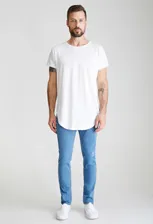

In [ ]:
i[4]